In [1]:
import plotly.express as px
import plotly.graph_objects as go
import json
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.io as pio
import folium
import geopandas as gpd

In [2]:
file_path = 'data/provincies/B1_Provinciegrenzen_van_NederlandPolygon.shp'
gdf_prov = gpd.read_file(file_path)


ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: DLL load failed while importing ogrext: Kan opgegeven module niet vinden.
Importing pyogrio resulted in: No module named 'pyogrio'

In [13]:
df = pd.read_csv('Stores_province_data.csv', delimiter = ';', index_col = 0)
df1 = []
df.iloc[5, :] #sum of all stores per province
for i in range(0, 12): 
    t = df.iloc[5,i*8] #only print the data from 2012
    df1.append(t)

province1 = ['Groningen', 'Fryslân', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
province = pd.DataFrame(province1, columns = ['Province'])
df3 = pd.DataFrame(df1, columns = ['Stores'])
df2 = pd.read_csv('Stores_province_data_2012.csv', delimiter = ';', index_col = 0)

df_2012 = pd.concat([province,df3], axis=1)

df4 = []
for i in range(0, 12):
    t = df.iloc[5,i*8+7]
    df4.append(t)
df5 = pd.DataFrame(df4, columns = ['Stores'])

df_2019 = pd.concat([province,df5], axis=1)
print(df_2019)

         Province  Stores
0       Groningen     850
1         Fryslân    1235
2         Drenthe     810
3      Overijssel    2030
4       Flevoland     665
5      Gelderland    3400
6         Utrecht    2130
7   Noord-Holland    5040
8    Zuid-Holland    5160
9         Zeeland     825
10  Noord-Brabant    4115
11        Limburg    2240


In [4]:
gdf_prov_2012 = pd.merge(gdf_prov, df_2012, left_on='PROV_NAAM', right_on='province', how='left')

gdf_prov_2019 = pd.merge(gdf_prov, df_2019, left_on='PROV_NAAM', right_on='province', how='left')


NameError: name 'gdf_prov' is not defined

NameError: name 'gdf_prov' is not defined

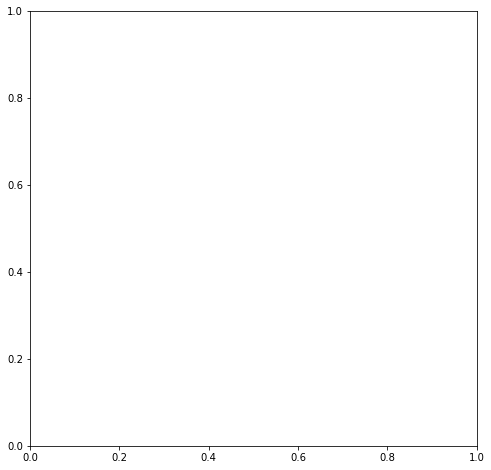

In [5]:
fig, ax = plt.subplots(figsize=(8,8))

column = 'Stores'
gdf_prov_2012.plot(ax=ax, facecolor='none', edgecolor='gray', column=column, legend=True)
plt.show()


